In [1]:
pip install fastapi

     |████████████████████████████████| 52 kB 726 kB/s 
     |████████████████████████████████| 60 kB 5.8 MB/s 
     |████████████████████████████████| 10.1 MB 27.6 MB/s 


In [2]:
pip install uvicorn[standard]

     |████████████████████████████████| 54 kB 1.6 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 103 kB 26.8 MB/s 
     |████████████████████████████████| 636 kB 49.1 MB/s 
     |████████████████████████████████| 344 kB 60.1 MB/s 
     |████████████████████████████████| 3.8 MB 37.5 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
pip install joblib


In [4]:
!pip install unidecode

     |████████████████████████████████| 241 kB 5.1 MB/s 


In [5]:
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=0380cc048ffc37e597155e3c9fc732074f150c23e65f2b27fecebbd0eecf18c8
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [6]:
!pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19878 sha256=6987b4f5a55003109f5b9450a31435982d0548cf5a98d453d31e0180029f22e3
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [7]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3 MB 1.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [8]:
import sklearn
sklearn.__version__

'0.24.2'

In [9]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
import pandas as pd

data = pd.read_csv(r"/content/comments_train.csv")
data

,comment,sentiment
0,J'ai réservé ma table quelques mois à l'avance...,Positive
1,Que dire... Nicolas sale est un chef d excepti...,Positive
2,Dans une rue tranquille non loin du Panthéon u...,Positive
3,Rien à redire le restaurant est irréprochablem...,Positive
4,Comme avec les autres commentaires nos repas é...,Positive
...,...,...
1612,Le service a été rapide et les crêpes très bon...,Positive
1613,Restaurant excellent bon rapport qualité-prix ...,Positive
1614,Incroyable mais vrai 190€ la baguette ! Que di...,Negative
1615,Un japonais assez chic des beaux quartiers. No...,Positive


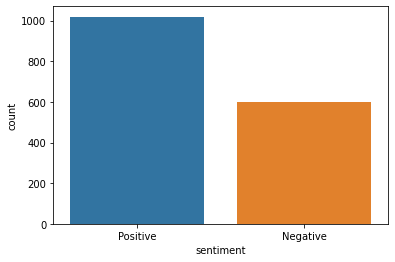

In [11]:
import seaborn as sns

sns.countplot(x ='sentiment', data=data)

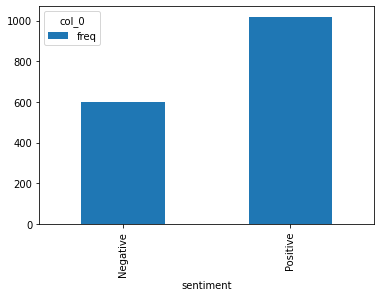

In [12]:
pd.crosstab(data.sentiment, "freq").plot.bar()

In [13]:
print('Le dataset a {} lignes et {} colonnes.'.format(data.shape[0], data.shape[1]))
print('Les différents variables sont : {}.'.format(data.columns.tolist()))

Le dataset a 1617 lignes et 2 colonnes.
Les différents variables sont : ['comment', 'sentiment'].


In [14]:
data2 = data.copy()
data2

,comment,sentiment
0,J'ai réservé ma table quelques mois à l'avance...,Positive
1,Que dire... Nicolas sale est un chef d excepti...,Positive
2,Dans une rue tranquille non loin du Panthéon u...,Positive
3,Rien à redire le restaurant est irréprochablem...,Positive
4,Comme avec les autres commentaires nos repas é...,Positive
...,...,...
1612,Le service a été rapide et les crêpes très bon...,Positive
1613,Restaurant excellent bon rapport qualité-prix ...,Positive
1614,Incroyable mais vrai 190€ la baguette ! Que di...,Negative
1615,Un japonais assez chic des beaux quartiers. No...,Positive


In [15]:
from unidecode import unidecode
import re
import nltk
import stop_words
from nltk.corpus import stopwords
from stop_words import get_stop_words
s_w=list(set(stopwords.words('french')+stop_words.get_stop_words('fr')))+['plus']

def nettoyage(texte):
    tex=[]
    s_w=list(set(stopwords.words('french')+stop_words.get_stop_words('fr')))+['plus']
    s_w=[unidecode(elem.lower()) for elem in s_w]
    # mettre en minuscule
    texte=texte.lower()
    # enlever les accents
    texte=unidecode(texte).replace("'"," ")
    
    # Lematize/Stem
    
    
    # enlever les chiffres et caracteres spéciaux
    pattern="([a-z]+)"
    
    for elem in re.findall(pattern,texte):
        # enlever les stop words
        if elem in s_w:
            continue
        else:
            tex.append(elem)
    return ' '.join(tex)

In [16]:
data.comment = data.comment.apply(nettoyage)

In [17]:
data.sentiment = data.sentiment.apply(nettoyage)

In [18]:
data

,comment,sentiment
0,reserve table quelques mois avance service imp...,positive
1,dire nicolas sale chef exception dire rien inc...,positive
2,rue tranquille non loin pantheon joyau culinai...,positive
3,rien redire restaurant irreprochablement propr...,positive
4,autres commentaires repas incroyablement delic...,positive
...,...,...
1612,service rapide crepes bonnes pates crepe salee...,positive
1613,restaurant excellent rapport qualite prix accu...,positive
1614,incroyable vrai baguette dis flute g reviendro...,negative
1615,japonais assez chic beaux quartiers alles deje...,positive


In [19]:
data.comment[0]

'reserve table quelques mois avance service impeccable pendant processus arrives temps rapidement assis personnel accueillant attention details verre champagne'

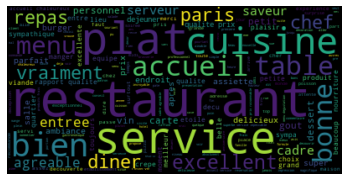

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(list(data['comment'])))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

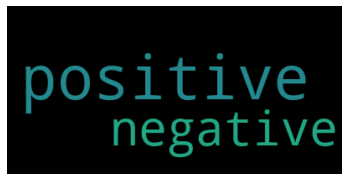

In [21]:
wordcloud = WordCloud().generate(' '.join(list(data['sentiment'])))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
import joblib

pipeline_filename = "/content/PipelineLudovic (1).joblib"

pipeline = joblib.load(pipeline_filename)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator BaggingClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at 

In [23]:
pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1)))])

In [24]:
pipeline.predict(data.comment)

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
data['sentiment'] = data['sentiment'].astype('category').cat.codes

In [26]:
y = data['sentiment'] 

In [68]:
pipeline.score(data.comment,y)

0.36982065553494126

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y, pipeline.predict(data.comment)))

              precision    recall  f1-score   support

           0       0.37      1.00      0.54       598
           1       0.00      0.00      0.00      1019

    accuracy                           0.37      1617
   macro avg       0.18      0.50      0.27      1617
weighted avg       0.14      0.37      0.20      1617



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
from sklearn.metrics import f1_score, roc_curve

print('Roc curve:', roc_curve(y , pipeline.predict(data.comment)))

Roc curve: (array([0., 1.]), array([0., 1.]), array([1, 0]))


In [71]:
f1_score(y,pipeline.predict(data.comment) , average='macro')

0.2699774266365689

In [72]:
f1_score(y,pipeline.predict(data.comment) , average='micro')

0.36982065553494126

In [73]:
f1_score(y,pipeline.predict(data.comment))

0.0

In [74]:
from sklearn.metrics import roc_auc_score
print('Roc curve:', roc_auc_score(y, pipeline.predict(data.comment)))

Roc curve: 0.5


<Figure size 432x288 with 0 Axes>

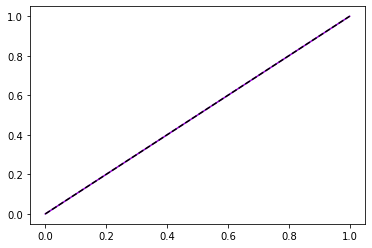

<Figure size 432x288 with 0 Axes>

In [34]:
from sklearn.metrics import roc_curve, auc

[fpr1, tpr1, thr1] = roc_curve(y, pipeline.predict(data.comment))
plt.figure()
plt.plot(fpr1, tpr1, color='darkviolet', label='ROC curve (area = %0.3f)' % auc(fpr1, tpr1))
plt.plot([0, 1], [0, 1], 'k--')
plt.figure()

In [35]:
auc(fpr1,tpr1)

0.5

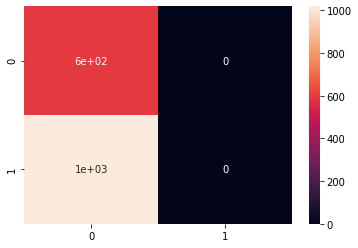

In [36]:
import sklearn.metrics as metrics
cnf_matrix = metrics.confusion_matrix(y,pipeline.predict(data.comment))
#print(cnf_matrix)
sns.heatmap(cnf_matrix,annot=True)

In [37]:
results={'Accuracy':[pipeline.score(data.comment,y)], 'F1 score' :[f1_score(y,pipeline.predict(data.comment))], 'Courbe Roc': [roc_auc_score(y, pipeline.predict(data.comment))]}
results

{'Accuracy': [0.36982065553494126], 'Courbe Roc': [0.5], 'F1 score': [0.0]}

In [38]:

DATA1 = pd.DataFrame(results, index=['valeurs'])
DATA1

,Accuracy,F1 score,Courbe Roc
valeurs,0.369821,0.0,0.5


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1,3))
X = vectorizer.fit_transform(data.comment)
print(vectorizer.get_feature_names())



['abasourdi', 'abasourdi bruit', 'abasourdi bruit terrible', 'abeille', 'abeille cadre', 'abeille cadre raffine', 'abeille excellent', 'abeille excellent restaurant', 'abeille restes', 'abeille restes plusieurs', 'abondance', 'abondance delicatesse', 'abondance delicatesse permettent', 'abondance mise', 'abondance mise bouche', 'abord', 'abord agreablement', 'abord agreablement surpris', 'abord attente', 'abord attente entre', 'abord attire', 'abord attire decue', 'abord cadre', 'abord cadre accueil', 'abord cadre agreable', 'abord commande', 'abord commande douzaine', 'abord entree', 'abord entree avce', 'abord entree puis', 'abord excite', 'abord excite curiosite', 'abord fils', 'abord fils amie', 'abord fortement', 'abord fortement incite', 'abord impression', 'abord impression entrer', 'abord petites', 'abord petites becassines', 'abord pierre', 'abord pierre gagnaire', 'abord plats', 'abord plats presentent', 'abord rables', 'abord rables ensuite', 'abordable', 'abordable agrement

In [75]:
X = data["comment"].values
y = data["sentiment"].values

In [76]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 1, stratify = y)

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

NpileLS =  Pipeline([('tfidf', TfidfVectorizer()), ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1)))])
NpileLS

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1)))])

In [78]:
NpileLS.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1)))])

In [63]:
NpileLS.score(X_test, y_test)

0.8127340823970037

In [64]:
NpileLS.predict(data.comment)

array([0, 1, 1, ..., 0, 1, 1], dtype=int8)

In [79]:
f1_score(y,NpileLS.predict(data.comment))

0.9460903351141331

<Figure size 432x288 with 0 Axes>

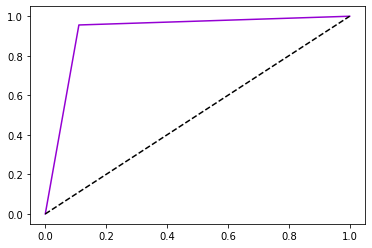

<Figure size 432x288 with 0 Axes>

In [80]:
from sklearn.metrics import roc_curve, auc

[fpr1, tpr1, thr1] = roc_curve(y, NpileLS.predict(data.comment))
plt.figure()
plt.plot(fpr1, tpr1, color='darkviolet', label='ROC curve (area = %0.3f)' % auc(fpr1, tpr1))
plt.plot([0, 1], [0, 1], 'k--')
plt.figure()

In [81]:
auc(fpr1, tpr1)

0.9227355824616565

In [82]:
joblib.dump(NpileLS, "PipelineLudovic.joblib")

['PipelineLudovic.joblib']

In [83]:
print(classification_report(y, NpileLS.predict(data.comment)))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       598
           1       0.94      0.96      0.95      1019

    accuracy                           0.93      1617
   macro avg       0.93      0.92      0.93      1617
weighted avg       0.93      0.93      0.93      1617



In [84]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
make_pipeline(
    TfidfVectorizer(),
    BaggingClassifier(DecisionTreeClassifier(random_state=1))
)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('baggingclassifier',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1)))])

In [85]:
y_test.sum()


337

In [58]:
data["sentiment"]

0       1
1       1
2       1
3       1
4       1
       ..
1612    1
1613    1
1614    0
1615    1
1616    1
Name: sentiment, Length: 1617, dtype: int8

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000) 
rf.fit(X_train, y_train)


ValueError: ignored

In [ ]:
y_pred2= rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

In [ ]:
from sklearn.metrics import roc_curve, auc

[fpr2, tpr2, thr2] = roc_curve(y_test, y_pred2)
plt.figure()
plt.plot(fpr2, tpr2, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr2, tpr2))
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot([0,fpr2[idx]], [tpr2[idx],tpr2[idx]], 'k--', color='green')
#plt.plot([fpr2[idx],fpr2[idx]], [0,tpr2[idx]], 'k--', color='green')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc(fpr2, tpr2)

In [ ]:
rf.feature_importances_

In [ ]:
f1_score(y_test, y_pred2)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
B = BaggingClassifier(DecisionTreeClassifier(random_state=1))
B.fit(X_train, y_train)


In [ ]:
y_pred= B.predict(X_test)

In [ ]:
import sklearn.metrics as metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#print(cnf_matrix)
sns.heatmap(cnf_matrix,annot=True)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='gold', label='ROC curve (area = %0.3f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
#plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc(fpr,tpr)

In [ ]:
from xgboost import XGBClassifier

mod = XGBClassifier(booster='gbtree',num_parallel_tree = 100)
mod

In [ ]:
mod1 = mod.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
ypred_test = mod1.predict(X_test)
ypred_train = mod1.predict(X_train)
aTR = accuracy_score(y_train, ypred_train)
aTe = accuracy_score(y_test, ypred_test)
print(aTR)
print(aTe)

In [ ]:
Moa = mod1.score(X_train, y_train)
Mot = mod1.score(X_test, y_test)
print(Moa) 
print(Mot)

In [ ]:
from sklearn.metrics import classification_report

crTr = classification_report(y_train, ypred_train)
crTe = classification_report(y_test, ypred_test)
print(crTr)
print(crTe)

In [ ]:
f1_score(y_test, ypred_test)

In [ ]:
[fpr3, tpr3, thr3] = metrics.roc_curve(y_test, ypred_test)
plt.figure()
plt.plot(fpr3, tpr3, color='violet', label='ROC curve (area = %0.3f)' % metrics.auc(fpr3, tpr3))
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
#plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc(fpr3,tpr3)

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

In [ ]:
yp2 = clf.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, yp2)

In [ ]:
f1_score(y_test, yp2)

In [ ]:
print(classification_report(y_test, yp2))

In [ ]:
[fpr4, tpr4, thr4] = metrics.roc_curve(y_test, yp2)
plt.figure()
plt.plot(fpr4, tpr4, color='darkviolet', label='ROC curve (area = %0.3f)' % metrics.auc(fpr4, tpr4))
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
#plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc(fpr4,tpr4)

In [ ]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()
m.fit(X_train, y_train)


In [ ]:
yp3 = m.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, yp3)

In [ ]:
f1_score(y_test, yp3)

In [ ]:
[fpr5, tpr5, thr5] = metrics.roc_curve(y_test, yp3)
plt.figure()
plt.plot(fpr5, tpr5, color='red', label='ROC curve (area = %0.3f)' % metrics.auc(fpr5, tpr5))
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
#plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc(fpr5, tpr5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from vecstack import stacking
from sklearn.svm import LinearSVC

In [ ]:
models = [
    KNeighborsClassifier(n_neighbors=19,
                        n_jobs=-1),
        
    RandomForestClassifier(random_state=42, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=42, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3),
    LinearSVC(random_state=42),
    
    LogisticRegression(random_state=42,n_jobs=-1)
    
    
]



S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

In [ ]:
model = XGBClassifier(random_state=42, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

In [ ]:

clf2 = LinearSVC()

clf2.fit(X_train, y_train)

In [ ]:
yp = clf2.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, yp)

In [ ]:
f1_score(y_test, yp)

In [ ]:
[fpr6, tpr6, thr6] = metrics.roc_curve(y_test, yp)
plt.figure()
plt.plot(fpr6, tpr6, color='green', label='ROC curve (area = %0.3f)' % metrics.auc(fpr6, tpr6))
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
#plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
auc(fpr6, tpr6)

In [ ]:
results={'Bagging':[metrics.accuracy_score(y_test, y_pred),auc(fpr,tpr),f1_score(y_test, y_pred)],
         'Pipelinejoblib' :[pipeline.score(data.comment,y), auc(fpr1,tpr1),f1_score(y,pipeline.predict(data.comment))],
         'RandomForest': [accuracy_score(y_test, y_pred2), auc(fpr2, tpr2),f1_score(y_test, y_pred2)],
         'XgBoost':[aTe,auc(fpr3,tpr3),f1_score(y_test, ypred_test)],
          'DecisionTree':[metrics.accuracy_score(y_test, yp2),auc(fpr4,tpr4),f1_score(y_test, yp2)],
          'Régression logistique':[metrics.accuracy_score(y_test, yp3),auc(fpr5,tpr5),f1_score(y_test, yp3)],
           'SVC':[metrics.accuracy_score(y_test, yp),auc(fpr6,tpr6),f1_score(y_test, yp)]}
results

In [ ]:
DATA1 = pd.DataFrame(results, index=['Accuracy', 'AUC', 'F1 Score'])
DATA1

In [ ]:
B1 = 0.84
B2 = 0.76
B3 = 0.88
PJ1 = 0.65
PJ2 = 0.53
PJ3 = 0.78
RF1 = 0.74
RF2 = 0.64
RF3 = 0.83
X1 = 0.78
X2 = 0.71
X3 = 0.84
DT1 = 0.73
DT2 = 0.70
DT3 = 0.79
RL1 = 0.68
RL2 = 0.57
RL3 = 0.80
SV1 = 0.81
SV2 = 0.75
SV3 = 0.87
T1 = 0.39
T2 = 0.50
T3 = 0.00

In [ ]:
results={'Bagging':[B1,B2,B3],
         'Pipelinejoblib' :[PJ1,PJ2,PJ3],
         'RandomForest': [RF1,RF2,RF3],
         'XgBoost':[X1,X2,X3],
         'DecisionTree':[DT1,DT2,DT3],
         'Régression logistique':[RL1,RL2,RL3],
         'SVC':[SV1,SV2,SV3],
         'Pipeline2':[T1,T2,T3]}
results

In [ ]:
DATA1 = pd.DataFrame(results, index=['Accuracy', 'AUC', 'F1 Score'])
DATA1